**K-Means Clustering with the UCI Heart Disease Dataset**

This project implements K-Means clustering on the UCI Heart Disease dataset to explore natural groupings of patients based on their health indicators. The dataset includes numeric features such as age, blood pressure, cholesterol levels, maximum heart rate, and other diagnostic measurements. By applying K-Means, the model groups patients into clusters without using the target labels, allowing us to uncover patterns and similarities in patient health profiles that may relate to heart disease risk.

The pipeline follows a structured workflow: data loading and cleaning, exploratory data analysis (EDA) with visualizations, feature selection, scaling with StandardScaler, and dimensionality reduction using PCA for visualization. The Elbow Method determines the optimal number of clusters, and the model’s performance is evaluated using the Silhouette Score. Cluster centers and PCA plots help interpret the characteristics of each group, providing insights into patient subgroups and demonstrating the effectiveness of unsupervised learning in a real-world healthcare dataset.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For nicer plots
sns.set(style="whitegrid", palette="muted")


In [18]:
# Load the UCI Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(url, header=None, names=columns, na_values="?")

# Fill missing values
data.fillna(data.mean(), inplace=True)

# Preview dataset
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [19]:
# Exploratory Data Analysis (EDA)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [20]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


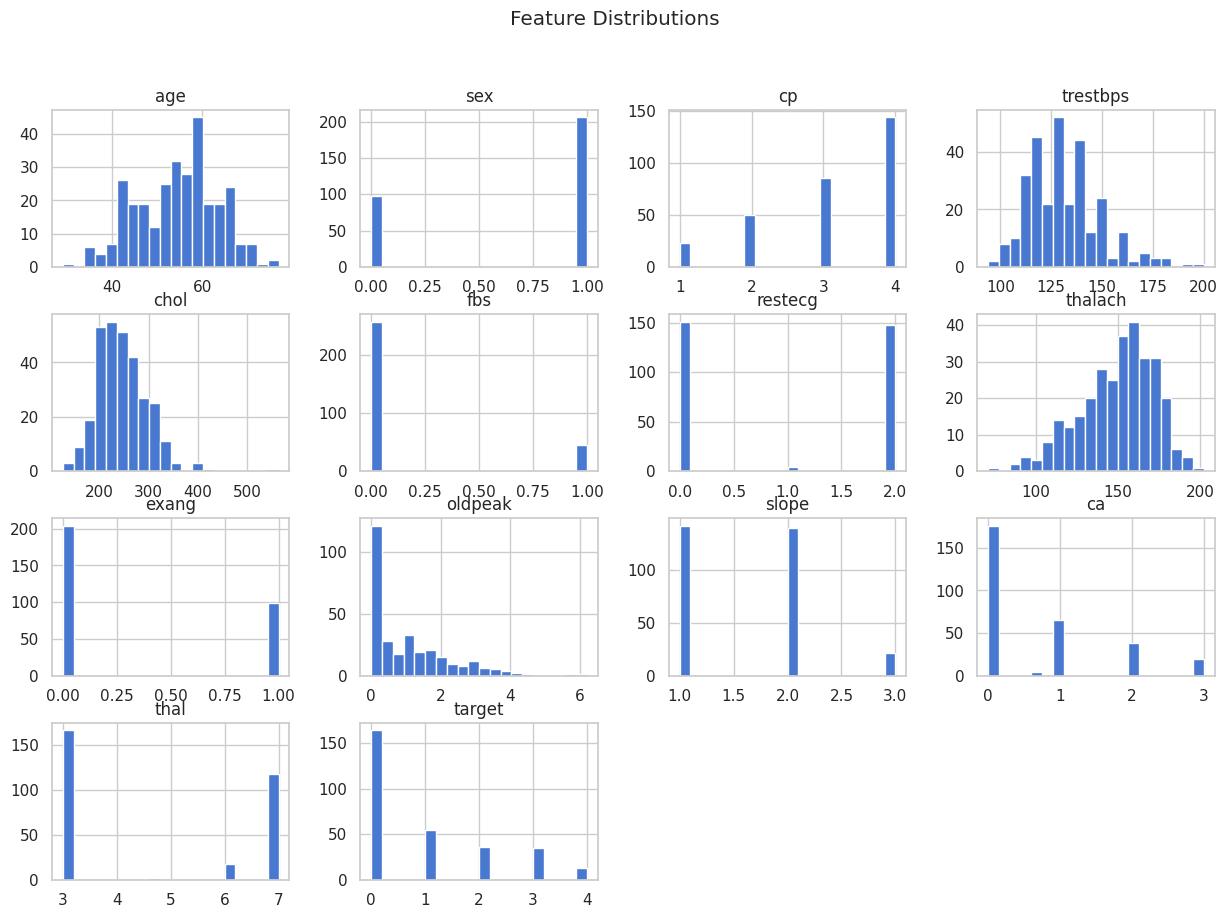

In [21]:
# Histograms
data.hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()


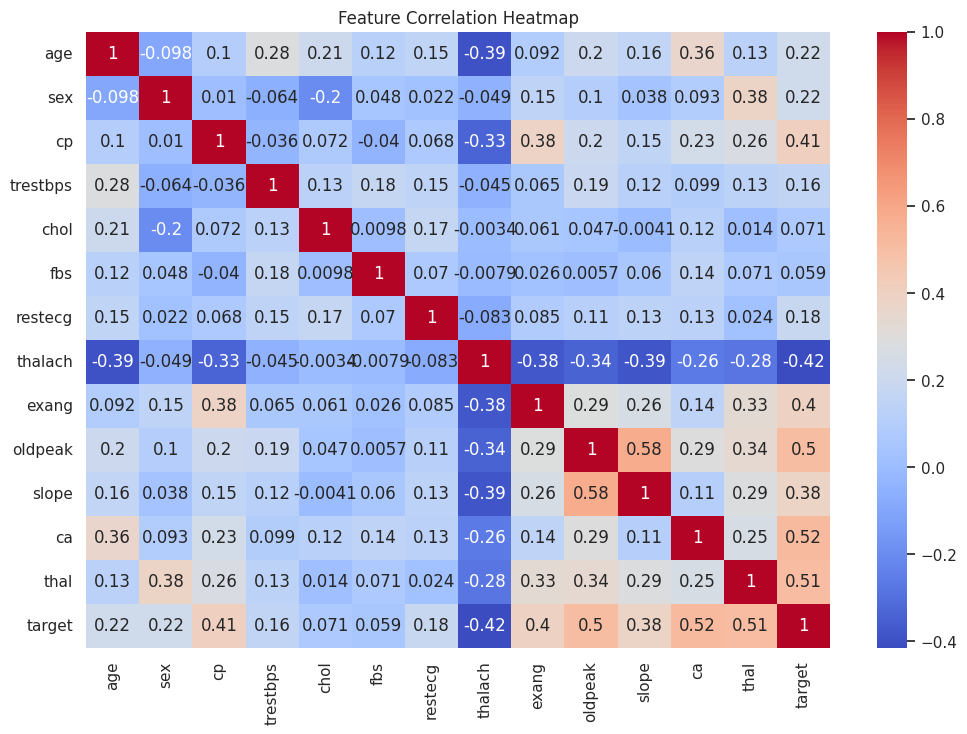

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


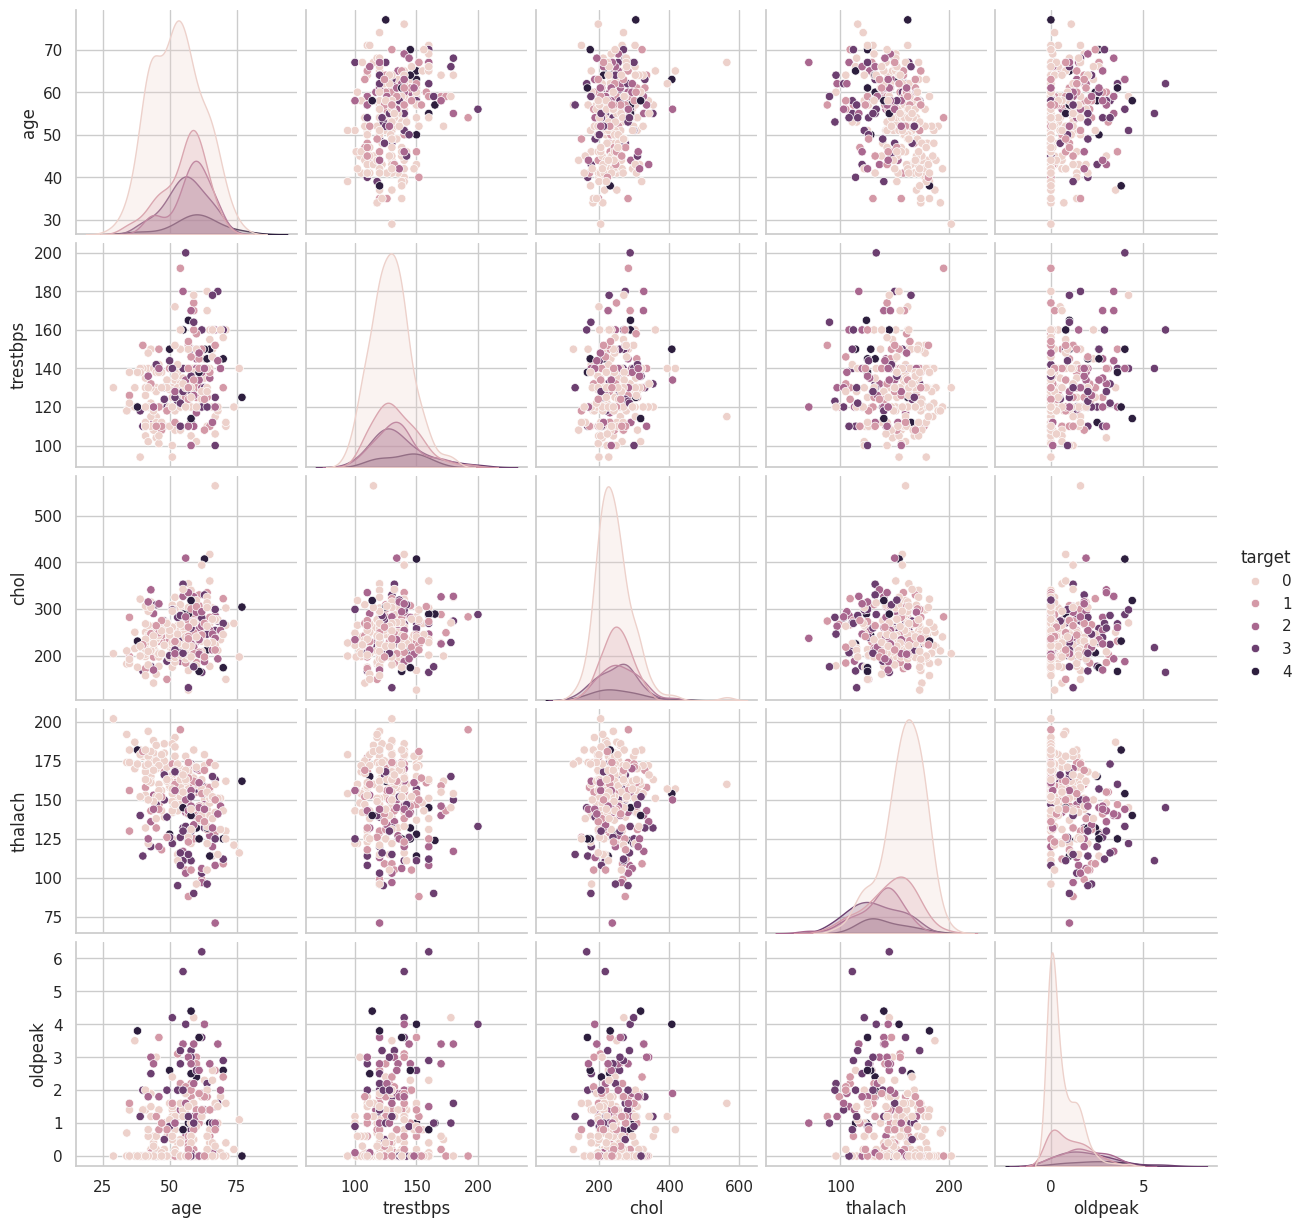

In [23]:
sns.pairplot(data, hue='target', vars=['age','trestbps','chol','thalach','oldpeak'])
plt.show()


In [24]:
# Feature Selection
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('target')  # Exclude target
X = data[numeric_features]

In [25]:
# Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
# Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


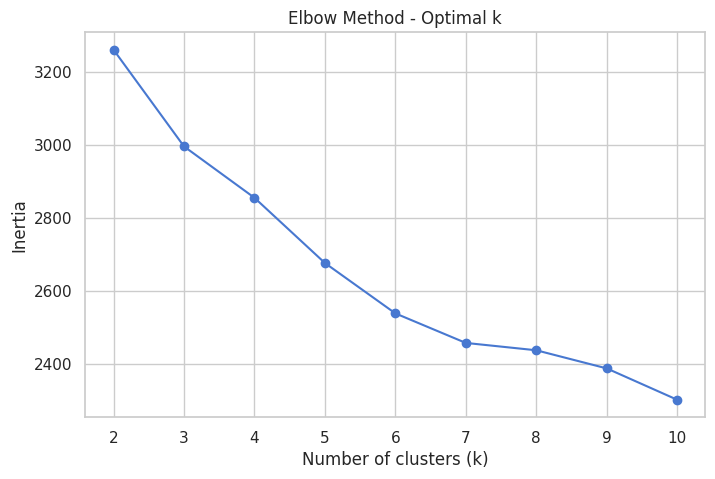

In [27]:
# Determine Optimal Number of Clusters
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method - Optimal k")
plt.show()


In [28]:
# Fit K-Means
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
data['cluster'] = clusters


In [29]:
# Evaluate Clustering
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.117


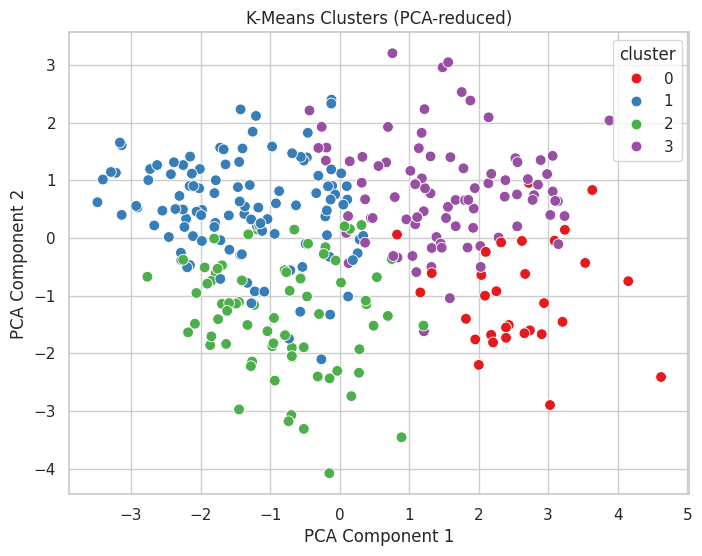

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['cluster'], palette='Set1', s=60)
plt.title("K-Means Clusters (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

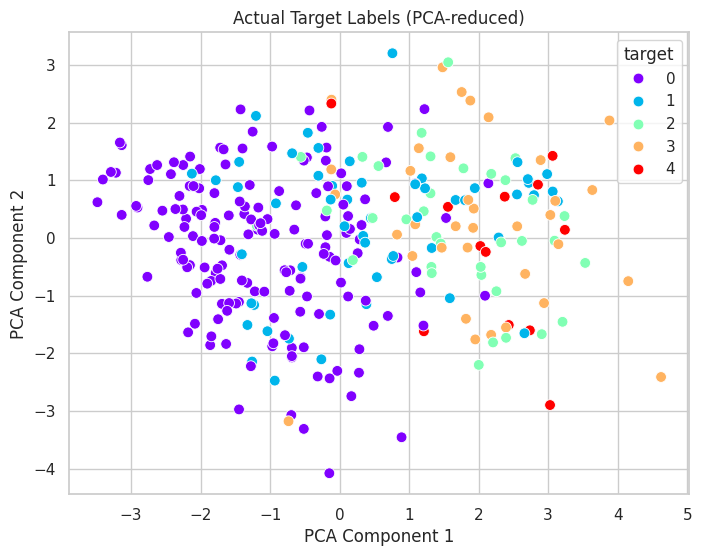

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['target'], palette='rainbow', s=60)
plt.title("Actual Target Labels (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [32]:
centers_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=numeric_features)
print("Cluster Centers (scaled features):")
print(centers_scaled)


Cluster Centers (scaled features):
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.684191 -0.143539  0.575105  1.095331  0.513915  0.670910  0.691937   
1 -0.682607  0.454473 -0.522418 -0.182821 -0.359362 -0.062959 -0.271188   
2  0.423475 -1.310481 -0.193850  0.071451  0.439756 -0.109462  0.065130   
3  0.268702  0.564413  0.617172 -0.214523 -0.092549 -0.066125  0.044287   

    thalach     exang   oldpeak     slope        ca      thal  
0 -0.506848  0.197481  1.432416  0.963719  1.289409  0.756098  
1  0.699267 -0.581381 -0.404115 -0.375955 -0.403145 -0.277720  
2  0.057986 -0.346146 -0.432424 -0.263819 -0.325252 -0.829434  
3 -0.751583  0.950910  0.363850  0.353574  0.324101  0.772006  


In [33]:
from joblib import dump, load

# Save the trained K-Means model
dump(kmeans, 'kmeans_heart_model.joblib')

['kmeans_heart_model.joblib']